In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
from utils.implementation_utils import *
from utils.preprocessing_utils import *
import datetime
%load_ext autoreload
%autoreload 2

In [2]:
from utils.io_utils import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


In [14]:
new_data, _, rmv_ind = preprocess_train_data_split(tX, y)

[ 4  5  6  8 12 22 23 24 25 26 27 28 29]
[ 3  4  5  6  9 12 22 23 26 27 28]
[22 23 29]
[21 22 29]


In [7]:
data_list, y_list, feat_ind = subdivide_data(tX, y)

[[1.0 -0.42489780917530356 0.1339055770956135 0.09779313139655348 -- --
  -- 0.16838154243918285 -0.058291073694878744 0.09781133167522213
  -0.028208029191461436 0.33953092700960935 -- 0.08816541743689257
  -0.01021549067817705 -0.005557175570542477 0.050531186219435954
  -0.0021500752310727516 0.0019444151078546487 -0.3366136753699433
  0.006634123963249338 0.11407553295761799 -- 0.07630377209068637
  0.0002683954555025334 -0.0013735963557679073 -- -- --
  0.07630377874407156]
 [-0.42489780917530356 1.0 0.2200990140724545 -0.17314088646966785 -- --
  -- 0.032912735579102195 0.06909649329426347 -0.010816309726669502
  0.33466198596277635 -0.4262949050067979 -- -0.0776563594006213
  0.0059303897368989085 0.005140438767403693 0.3660764777663905
  0.009018657852938042 -0.001399728439441013 0.2655241363507413
  -0.015876842998834243 -0.051715271199512844 -- -0.1524598650656572
  -0.0007455777040061264 0.007109557582876073 -- -- --
  -0.15245986638917672]
 [0.1339055770956135 0.22009901407

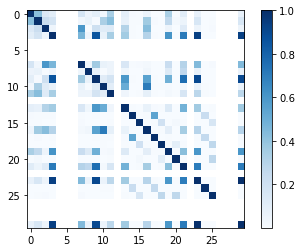

In [12]:
corr_mat = np.ma.corrcoef(data_list[1], rowvar=False)
print(corr_mat)
#corr_mat[corr_mat == np.nan] = 0
plt.imshow(np.abs(corr_mat), cmap='Blues')
plt.colorbar()
plt.show()

In [96]:
corr_indices = np.argwhere(np.abs(np.triu(corr_mat - np.eye(30))) > 0.8)
print(corr_indices)

[[ 0  2]
 [ 3  9]
 [ 3 23]
 [ 3 29]
 [ 4  5]
 [ 9 21]
 [ 9 23]
 [ 9 29]
 [21 29]
 [22 29]
 [23 29]
 [26 29]]


In [97]:
unique_ind1 = np.unique(corr_indices[:, 0])
unique_ind2 = np.unique(corr_indices[:, 1])
print(unique_ind1, unique_ind2)

[ 0  3  4  9 21 22 23 26] [ 2  5  9 21 23 29]


In [98]:
len1 = len(unique_ind1)
len2 = len(unique_ind2)
corr_ind_reduce_short = (unique_ind1, unique_ind2)[len(unique_ind1) > len(unique_ind2)]
corr_ind_reduce_big = (unique_ind1, unique_ind2)[len(unique_ind1) < len(unique_ind2)]
corr_ind_to_keep = []
for ind in corr_ind_reduce_short:
    is_in = np.isin(ind, corr_ind_reduce_big)
    if not is_in:
        corr_ind_to_keep.append(ind)

In [99]:
all_ind = np.unique(corr_indices.flatten())
print(all_ind.shape)

(11,)


In [100]:
corr_ind_to_throw = np.setdiff1d(all_ind, corr_ind_to_keep)

In [101]:
np.array(corr_ind_to_keep), corr_ind_to_throw

(array([ 2,  5, 29]), array([ 0,  3,  4,  9, 21, 22, 23, 26]))

In [107]:
keep, throw = feature_selection(new_data, 0.8)

In [108]:
keep, throw

(array([ 2,  5, 29]), array([ 0,  3,  4,  9, 21, 22, 23, 26]))

In [19]:
ind = np.array((rmv_ind[0], rmv_ind[1]))
print(ind)

[array([ 4,  5,  6,  8, 12, 22, 23, 24, 25, 26, 27, 28, 29])
 array([ 3,  4,  5,  6,  9, 12, 22, 23, 26, 27, 28])]


/Users/AntoineDaeniker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [6]:
ws = load_csv_data('../sgd_model_split.csv')

ValueError: Some errors were detected !
    Line #3 (got 29 columns instead of 21)
    Line #4 (got 28 columns instead of 21)